In [144]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
# Load the dataset into a Pandas DataFrame
#df = pd.read_csv('sleeptime_prediction_dataset.csv')

In [146]:
!pip install matplotlib

In [147]:
!pip install seaborn

In [148]:
sleep=pd.read_csv('sleeptime_prediction_dataset.csv')

In [149]:
import os
os.getcwd()

'C:\\Users\\User\\Desktop'

In [150]:
# View the first few rowsrt  of the dataset
sleep.head()

,WorkoutTime,ReadingTime,PhoneTime,WorkHours,CaffeineIntake,RelaxationTime,SleepTime
0,1.12,0.52,3.29,7.89,216.08,0.75,3.45
1,2.85,0.49,4.22,5.03,206.18,0.67,4.88
2,2.20,1.81,4.04,9.23,28.73,0.35,3.61
3,1.80,0.50,1.62,7.68,276.77,1.21,4.94
4,0.47,0.54,1.60,4.94,170.54,0.95,5.50


In [151]:
# Get information about data types and missing values
sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   WorkoutTime     2000 non-null   float64
 1   ReadingTime     2000 non-null   float64
 2   PhoneTime       2000 non-null   float64
 3   WorkHours       2000 non-null   float64
 4   CaffeineIntake  2000 non-null   float64
 5   RelaxationTime  2000 non-null   float64
 6   SleepTime       2000 non-null   float64
dtypes: float64(7)
memory usage: 109.5 KB


In [152]:
# Get summary statistics of numeric columns
sleep.describe()

,WorkoutTime,ReadingTime,PhoneTime,WorkHours,CaffeineIntake,RelaxationTime,SleepTime
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1.495915,0.992785,2.985195,6.926945,147.493780,1.010955,4.884375
std,0.876639,0.577303,1.151776,1.723843,84.651139,0.582619,2.028892
min,0.010000,0.000000,1.000000,4.000000,0.020000,0.000000,0.150000
25%,0.710000,0.500000,1.990000,5.440000,75.980000,0.510000,3.840000
50%,1.520000,0.990000,2.965000,6.910000,146.010000,1.010000,4.600000
75%,2.250000,1.500000,3.960000,8.422500,218.902500,1.530000,5.470000
max,3.000000,2.000000,5.000000,10.000000,299.850000,2.000000,19.810000


In [153]:
# Check for missing values
sleep.isnull().sum()

WorkoutTime       0
ReadingTime       0
PhoneTime         0
WorkHours         0
CaffeineIntake    0
RelaxationTime    0
SleepTime         0
dtype: int64

In [154]:
sleep.shape

(2000, 7)

In [155]:
sleep.columns

Index(['WorkoutTime', 'ReadingTime', 'PhoneTime', 'WorkHours',
       'CaffeineIntake', 'RelaxationTime', 'SleepTime'],
      dtype='object')

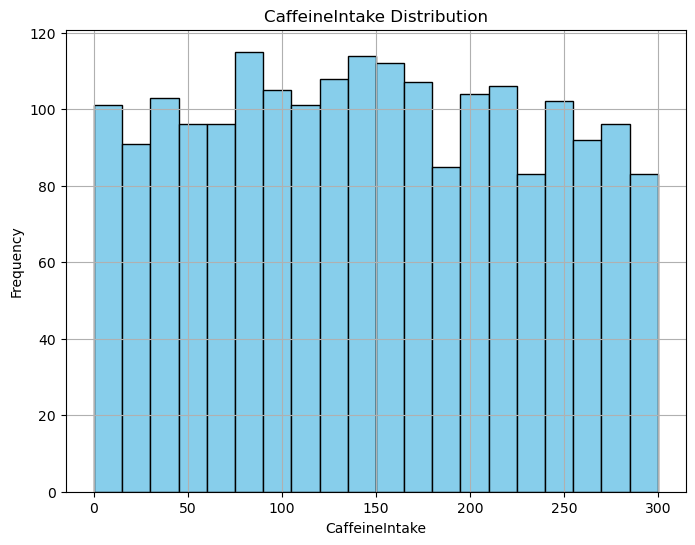

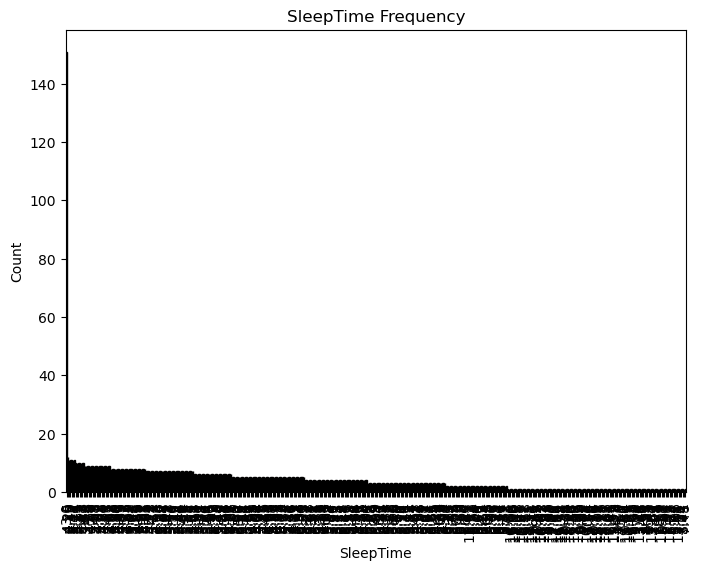

In [156]:
# Age Distribution
plt.figure(figsize=(8, 6))
sleep['CaffeineIntake'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title('CaffeineIntake Distribution')
plt.xlabel('CaffeineIntake')
plt.ylabel('Frequency')
plt.show()

# Chest Pain Type Frequency
plt.figure(figsize=(8, 6))
sleep['SleepTime'].value_counts().plot(kind='bar', color='salmon', edgecolor='black')
plt.title('SleepTime Frequency')
plt.xlabel('SleepTime')
plt.ylabel('Count')
plt.show()

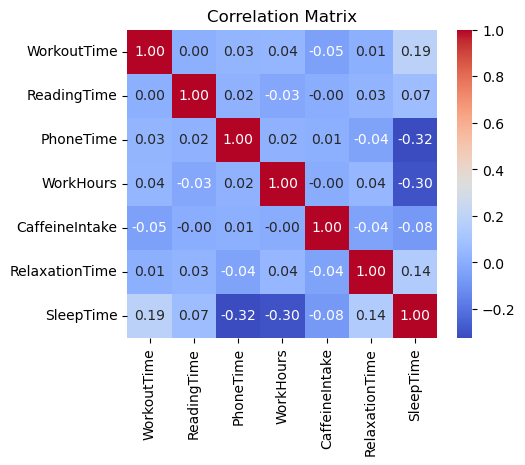

In [157]:
# Correlation Heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(sleep.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


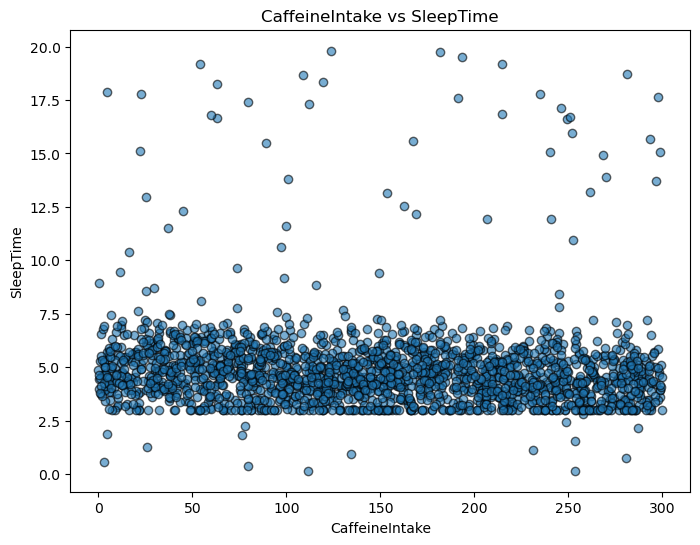

In [158]:
# Age vs Cholesterol
plt.figure(figsize=(8, 6))
plt.scatter(sleep['CaffeineIntake'], sleep['SleepTime'], alpha=0.6, edgecolor='k')
plt.title('CaffeineIntake vs SleepTime')
plt.xlabel('CaffeineIntake')
plt.ylabel('SleepTime')
plt.show()

In [ ]:
# Resting Blood Pressure by Chest Pain Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='CaffeineIntake', y='SleepTime', data=sleep, palette='Set2')
plt.title('SleepTime by CaffeineIntake')
plt.xlabel('CaffeineIntake')
plt.ylabel('SleepTime')
plt.show()

In [ ]:
# Exercise-Induced Angina by Heart Disease Status
plt.figure(figsize=(16, 12))
sns.countplot(x='SleepTime', hue='CaffeineIntake', data=sleep, palette='pastel')
plt.title('CaffeineIntake by SleepTime Status')
plt.xlabel('SleepTime')
plt.ylabel('Count') 
plt.legend(title='CaffeineIntake', loc='upper right')
plt.show() 

In [161]:
data = pd.read_csv('sleeptime_prediction_dataset.csv')

In [162]:
data.columns

Index(['WorkoutTime', 'ReadingTime', 'PhoneTime', 'WorkHours',
       'CaffeineIntake', 'RelaxationTime', 'SleepTime'],
      dtype='object')

In [163]:
sleep.dtypes

WorkoutTime       float64
ReadingTime       float64
PhoneTime         float64
WorkHours         float64
CaffeineIntake    float64
RelaxationTime    float64
SleepTime         float64
dtype: object

In [164]:
from sklearn.model_selection import train_test_split
# Perform the train-test split
y = sleep['SleepTime']
X = sleep.drop('SleepTime', axis =1, inplace=False)
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.20)
print(X_train.shape)

(1600, 6)


In [165]:
# Get the categorical and numerical variable column indices
num_var = ['ReadingTime', 'WorkHours', 'RelaxationTime','WorkoutTime', 'PhoneTime', 'CaffeineIntake']
# Splice the training array

X_train_num = X_train[num_var]

# Splice the test array

X_test_num = X_test[num_var]

In [166]:
#from sklearn.preprocessing import OneHotEncoder
#dummy_e = OneHotEncoder(categories='auto', drop='first', sparse_output=False)

In [167]:
#import warnings
#warnings.filterwarnings('ignore')

# Categorical feature encoding
#X_train_dummy = dummy_e.fit_transform(X_train_cat)
#X_test_dummy = dummy_e.transform(X_test_cat)


# Check the shape
#X_train_dummy.shape, X_test_dummy.shape

In [168]:
# Numerical feature standardization

# Impute the data
#X_train_imp = imputer.fit_transform(X_train_num)
#X_test_imp = imputer.transform(X_test_num)

# Check for missing values
#np.isnan(X_train_imp).any(), np.isnan(X_test_imp).any()

# normalize
norm_e=StandardScaler() 
dummy_e=OneHotEncoder(categories='auto',drop='first')
X_train_norm = norm_e.fit_transform(X_train_num)
X_test_norm = norm_e.transform(X_test_num)

X_train_norm.shape, X_test_norm.shape

((1600, 6), (400, 6))

In [173]:
X_train

,WorkoutTime,ReadingTime,PhoneTime,WorkHours,CaffeineIntake,RelaxationTime
1662,2.76,0.10,4.25,8.67,78.77,1.26
631,2.69,1.41,2.25,4.83,66.45,1.48
1287,1.05,1.61,1.20,5.70,246.09,0.68
1105,0.52,0.87,1.43,4.40,87.39,0.21
1879,1.70,0.46,2.95,4.27,166.44,1.71
...,...,...,...,...,...,...
1538,0.54,1.35,3.11,6.43,10.14,1.19
463,1.75,1.14,1.54,5.61,241.06,1.82
424,0.17,0.58,2.26,6.62,39.10,1.56
1229,1.23,0.44,3.39,6.54,221.05,0.88


In [177]:
#X_train = np.hstack((X_train_dummy, X_train_norm))
#X_test = np.hstack((X_test_dummy, X_test_norm))

#X_train.shape, X_test.shape

In [181]:
X_train = pd.DataFrame(X_train)
X_train.columns = ['ReadingTime', 'WorkHours', 'RelaxationTime','WorkoutTime', 'PhoneTime', 'CaffeineIntake']

X_test = pd.DataFrame(X_test)

X_test.columns = ['ReadingTime', 'WorkHours', 'RelaxationTime','WorkoutTime', 'PhoneTime', 'CaffeineIntake' ]
y_train = pd.DataFrame(y_train)
y_train.columns = ['SleepTime']

y_test = pd.DataFrame(y_test)
y_test.columns = ['SleepTime']

X_train.to_csv('sleep_X_train.csv')
X_test.to_csv('sleep_X_test.csv')
y_train.to_csv('sleep_y_train.csv')
y_test.to_csv('sleep_y_test.csv')
